In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [5]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [54]:
def naive(p, q):
    D1=np.ones((1,q.shape[0]))
    Dx1=np.array([p[:,0]]).transpose()*D1
    Dy1=np.array([p[:,1]]).transpose()*D1
    
    D2=np.ones((p.shape[0],1))
    Dx2=D2*np.array([q[:,0]])
    Dy2=D2*np.array([q[:,1]])
    
    D=np.sqrt((Dx1-Dx2)*(Dx1-Dx2)+(Dy1-Dy2)*(Dy1-Dy2))
        
naive(p,q)

[[0.60599073 0.93659449 0.91124856 0.59321356 0.27561751]
 [0.80746999 0.21102354 0.67268649 0.22495084 0.46534491]
 [0.35654215 0.75217493 0.57200052 0.49900068 0.23310825]
 [0.67281411 0.52407472 0.31520226 0.63212897 0.70277376]]


### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [55]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [56]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [89]:
C=np.ones((3,4))

array([[1., 1., 1., 1.]])

In [96]:
def with_indices(p, q):
    rows, cols = np.indices((p.shape[0], q.shape[0]))
    D=np.array([np.linalg.norm(p[rows.ravel()]-q[cols.ravel()],axis=1)])
    
with_indices(p,q)

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [65]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

### Numpy Magic

In [66]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

# Compare methods

In [97]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 0.43934908 0.11538591 0.31597171]
 [0.36793546 0.26458429 0.17280535 ... 0.30474448 0.02558792 0.34613915]
 ...
 [0.350195   0.20106403 0.44910122 ... 0.67437541 0.34780959 0.32550039]
 [0.79052694 0.41329933 0.60597746 ... 0.46636886 0.43689966 0.76505453]
 [0.09829934 0.40263092 0.18791272 ... 0.51510873 0.27875596 0.08695284]]
[[0.81251912 0.71146165 0.52745208 ... 0.20165309 0.52205656 0.79952357]
 [0.3426908  0.14028732 0.26822528 ... 

9.64 ms ± 80.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
450 µs ± 1.63 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.84 ms ± 133 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


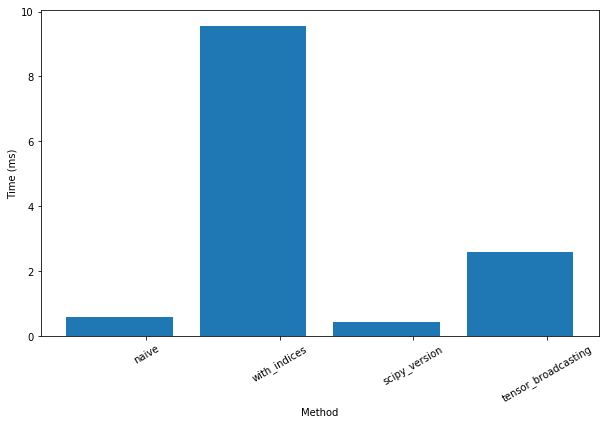

In [98]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()